In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from test_model import make_sin_data, LnLikelihood, LnPrior
from impulse.base import TestSampler

import matplotlib.pyplot as plt

import corner

In [6]:
x, data, omega_real, a_real, phi_real = make_sin_data(1000)

In [7]:
lnlike = LnLikelihood(x, data)
lnprior = LnPrior([0, 0, 0], [3, 5, np.pi])

In [17]:
sampler = TestSampler(3, lnlike, lnprior)

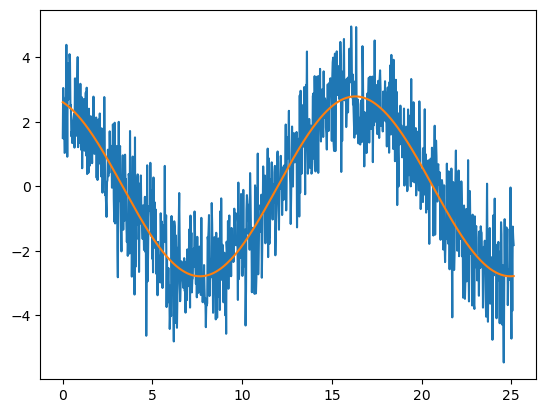

In [18]:
plt.plot(x, data)
plt.plot(x, a_real * np.sin(omega_real*x + phi_real))

In [19]:
sampler.sample(np.array([2, 3, 1]), 100_000)

  0%|          | 0/99999 [00:00<?, ?it/s]

100%|██████████| 99999/99999 [00:10<00:00, 9827.44it/s] 


In [20]:
from emcee.autocorr import integrated_time

In [21]:
with open('./chains/chain_1.txt', 'r') as f:
    chain = np.loadtxt(f)

In [24]:
print(omega_real, a_real, phi_real)

0.36331900595956845 2.7906418184420128 1.930808303282527


(-1.0, 1.0)

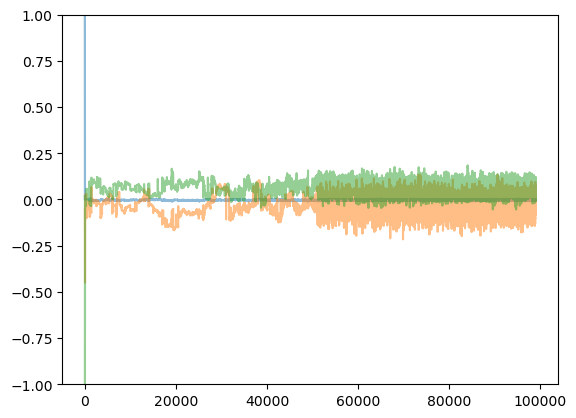

In [29]:
plt.plot(chain[:, 0] - omega_real, alpha = 0.5)
plt.plot(chain[:, 1] - a_real, alpha = 0.5)
plt.plot(chain[:, 2] - phi_real, alpha = 0.5)
plt.ylim([-1, 1])

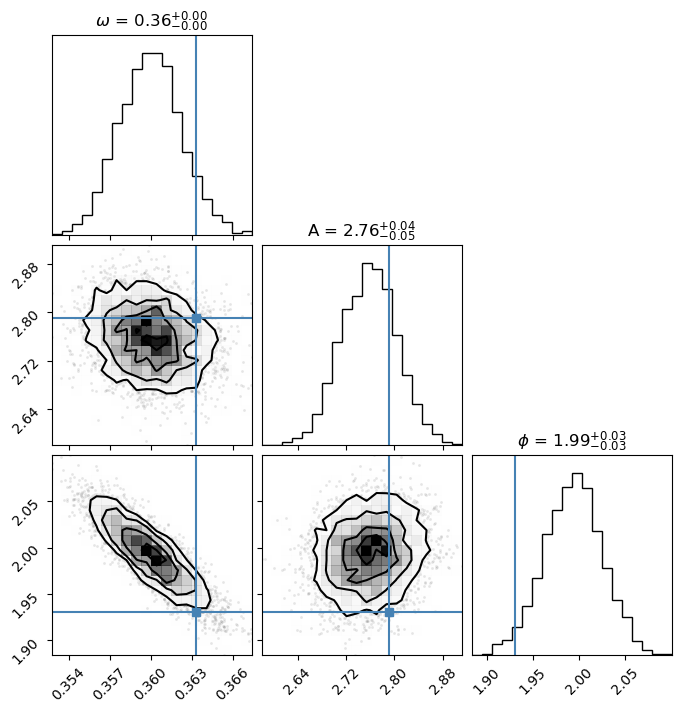

In [26]:
burn = 60_000

corner.corner(chain[burn::10, :3], truths=[omega_real, a_real, phi_real],
              titles=[r'$\omega$', r'A', r'$\phi$'], show_titles=True)
plt.show()